In [ ]:
import textwrap

In [ ]:
import pandas as pd
df =pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LlmaIndex/vendas.csv")
df.head()

,ID_compra,filial,cidade,tipo_cliente,genero,tipo_produto,preco_unitario,quantidade,imposto_5%,total,data,hora,forma_pagamento,avaliacao
0,750-67-8428,A,Santo André,Membro,Feminino,Saúde e Beleza,74.69,7,26.1415,548.9715,2024-01-05,13:08:00,Carteira Digital,9.1
1,226-31-3081,C,São Caetano,Normal,Feminino,Eletrônicos,15.28,5,3.8200,80.2200,2024-03-08,10:29:00,Dinheiro,9.6
2,631-41-3108,A,Santo André,Normal,Masculino,Casa,46.33,7,16.2155,340.5255,2024-03-03,13:23:00,Cartão de Crédito,7.4
3,123-19-1176,A,Santo André,Membro,Masculino,Saúde e Beleza,58.22,8,23.2880,489.0480,2024-01-27,20:33:00,Carteira Digital,8.4
4,373-73-7910,A,Santo André,Normal,Masculino,Esportes e Viagem,86.31,7,30.2085,634.3785,2024-02-08,10:37:00,Carteira Digital,5.3


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
!pip install llama-index llama-index-experimental -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.3/251.3 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.3/302.3 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.2/189.2 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.7/288.7 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24

In [ ]:
from google.colab import userdata
key = userdata.get('GROQ-API')

In [ ]:
!pip install llama-index-llms-groq -q

In [ ]:
from llama_index.core import Settings
from llama_index.llms.groq import Groq

Settings.llm = Groq(model='llama3-70b-8192', api_key=key)

In [ ]:
from llama_index.experimental.query_engine.pandas import PandasQueryEngine

query_engine = PandasQueryEngine(df=df, verbose=True)
response = query_engine.query('Qual é a forma de pagamento mais utilizada pelos clientes em cada filial?')

> Pandas Instructions:
```
df.groupby('filial')['forma_pagamento'].value_counts().groupby('filial').idxmax()
```
> Pandas Output: filial
A    (A, Carteira Digital)
B    (B, Carteira Digital)
C            (C, Dinheiro)
Name: count, dtype: object


In [ ]:
df.forma_pagamento.value_counts()

,count
forma_pagamento,
Carteira Digital,345
Dinheiro,344
Cartão de Crédito,311


In [ ]:
response = query_engine.query('Qual é o tipo de produto com maior quantidade por filial?')

> Pandas Instructions:
```
df.groupby(['filial', 'tipo_produto'])['quantidade'].sum().groupby('filial').idxmax()
```
> Pandas Output: filial
A                   (A, Casa)
B      (B, Esportes e Viagem)
C    (C, Alimentos e Bebidas)
Name: quantidade, dtype: object


In [ ]:
df.groupby(['filial', 'tipo_produto'])['quantidade'].sum()

filial  tipo_produto       
A       Alimentos e Bebidas    313
        Casa                   371
        Eletrônicos            322
        Esportes e Viagem      333
        Moda                   263
        Saúde e Beleza         257
B       Alimentos e Bebidas    270
        Casa                   295
        Eletrônicos            316
        Esportes e Viagem      322
        Moda                   297
        Saúde e Beleza         320
C       Alimentos e Bebidas    369
        Casa                   245
        Eletrônicos            333
        Esportes e Viagem      265
        Moda                   342
        Saúde e Beleza         277
Name: quantidade, dtype: int64

In [ ]:
query_engine = PandasQueryEngine(df=df, verbose=True, synthesize_response=True)


In [ ]:
response = query_engine.query('Qual é a avaliação média de cada filial?')

> Pandas Instructions:
```
df.groupby('filial')['avaliacao'].mean()
```
> Pandas Output: filial
A    7.027059
B    6.818072
C    7.072866
Name: avaliacao, dtype: float64


In [ ]:
def formatar_texto(response):
    texto = response.response
    texto_formatado = textwrap.fill(texto, width=100)
    print(texto_formatado)

In [ ]:
formatar_texto(response)

A avaliação média de cada filial é a seguinte: a filial A tem uma avaliação média de 7.03, a filial
B tem uma avaliação média de 6.82 e a filial C tem uma avaliação média de 7.07.


> Pandas Instructions:
```
df.groupby('tipo_produto')['total'].sum().sort_values().plot(kind='barh')
```
> Pandas Output: Axes(0.125,0.11;0.775x0.77)


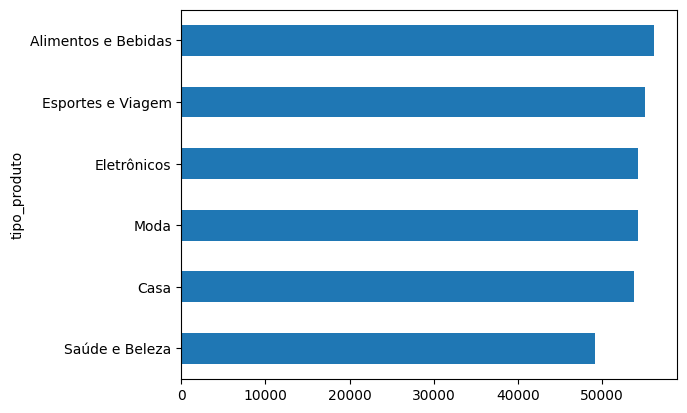

In [ ]:
response = query_engine.query('''Plote o valor total por tipo de produto,
ordenando do menor para o maior e mantendo as barras na horizontal''')

In [ ]:
query_engine = PandasQueryEngine(df=df, verbose=True)
response = query_engine.query('Qual é o faturamento de cada unidade? Ordene do maior para o menor valor')

> Pandas Instructions:
```
df.groupby('filial')['total'].sum().sort_values(ascending=False)
```
> Pandas Output: filial
C    110568.7065
A    106200.3705
B    106197.6720
Name: total, dtype: float64


In [ ]:
response = query_engine.query('Qual é a média de gasto por tipo de cliente?')
print(response.response)

> Pandas Instructions:
```
df.groupby('tipo_cliente')['total'].mean()
```
> Pandas Output: tipo_cliente
Membro    327.791305
Normal    318.122856
Name: total, dtype: float64
tipo_cliente
Membro    327.791305
Normal    318.122856
Name: total, dtype: float64


In [ ]:
from llama_index.core import PromptTemplate
from llama_index.experimental.query_engine.pandas import PandasInstructionParser

In [ ]:
# Função para obter uma descrição das colunas do DataFrame
def descricao_colunas(df):
  descricao = '\n'.join([f"`{col}`: {str(df[col].dtype)}" for col in df.columns])
  return 'Aqui estão os detalhes das colunas do DataFrame:\n' + descricao

# Instruções para orientar o modelo a converter uma consulta em linguagem natural em código Python executável com a biblioteca Pandas
instruction_str = (
    "1. Converta a consulta para código Python executável usando Pandas.\n"
    "2. A linha final do código deve ser uma expressão Python que possa ser chamada com a função `eval()`.\n"
    "3. O código deve representar uma solução para a consulta.\n"
    "4. IMPRIMA APENAS A EXPRESSÃO.\n"
    "5. Não coloque a expressão entre aspas.\n")

# Prompt que será enviado ao modelo para que ela gere o código Pandas desejado
pandas_prompt_str = (
    "Você está trabalhando com um dataframe do pandas em Python chamado `df`.\n"
    "{colunas_detalhes}\n\n"
    "Este é o resultado de `print(df.head())`:\n"
    "{df_str}\n\n"
    "Siga estas instruções:\n"
    "{instruction_str}\n"
    "Consulta: {query_str}\n\n"
    "Expressão:"
)

# Prompt para guiar o modelo a sintetizar uma resposta com base nos resultados obtidos pela consulta Pandas
response_synthesis_prompt_str = (
   "Dada uma pergunta de entrada, atue como analista de dados e elabore uma resposta a partir dos resultados da consulta.\n"
   "Responda de forma natural, sem introduções como 'A resposta é:' ou algo semelhante.\n"
   "Consulta: {query_str}\n\n"
   "Instruções do Pandas (opcional):\n{pandas_instructions}\n\n"
   "Saída do Pandas: {pandas_output}\n\n"
   "Resposta:"
   "Ao final, exibir o código usado para gerar a resposta, no formato: O código utilizado foi {pandas_instructions}"
)

# Módulo para obter as instruções Pandas
pandas_prompt = PromptTemplate(pandas_prompt_str).partial_format(
    instruction_str=instruction_str, colunas_detalhes=descricao_colunas(df), df_str=df.head(5)
)
# Módulo para executar as instruções Pandas
pandas_output_parser = PandasInstructionParser(df)

# Módulo para sintetizar a resposta
response_synthesis_prompt = PromptTemplate(response_synthesis_prompt_str)

# Modelo
llm = Groq(model='llama3-70b-8192', api_key=key)

In [ ]:
from llama_index.core.query_pipeline import (QueryPipeline as QP, Link, InputComponent)

In [ ]:
qp = QP(
    modules = {
        "input":InputComponent(),
        "pandas_prompt": pandas_prompt,
        "llm1":llm,
        "pandas_output_parser":pandas_output_parser,
        "response_synthesis_prompt":response_synthesis_prompt,
        "llm2":llm
    },
    verbose=True
)

qp.add_chain(["input","pandas_prompt","llm1","pandas_output_parser"])

qp.add_links(
    [
        Link("input", "response_synthesis_prompt", dest_key="query_str"),
        Link(
            "llm1", "response_synthesis_prompt", dest_key="pandas_instructions"
        ),
        Link(
            "pandas_output_parser",
            "response_synthesis_prompt",
            dest_key="pandas_output",
        ),
    ]
)
qp.add_link("response_synthesis_prompt", "llm2")

In [ ]:
response = qp.run(query_str="Qual é a média gasta por cada tipo de cliente?")

> Running module input with input: 
query_str: Qual é a média gasta por cada tipo de cliente?

> Running module pandas_prompt with input: 
query_str: Qual é a média gasta por cada tipo de cliente?

> Running module llm1 with input: 
messages: Você está trabalhando com um dataframe do pandas em Python chamado `df`.
Aqui estão os detalhes das colunas do DataFrame:
`ID_compra`: object
`filial`: object
`cidade`: object
`tipo_cliente`: object
`...

> Running module pandas_output_parser with input: 
input: assistant: df.groupby('tipo_cliente')['total'].mean()

> Running module response_synthesis_prompt with input: 
query_str: Qual é a média gasta por cada tipo de cliente?
pandas_instructions: assistant: df.groupby('tipo_cliente')['total'].mean()
pandas_output: tipo_cliente
Membro    327.791305
Normal    318.122856
Name: total, dtype: float64

> Running module llm2 with input: 
messages: Dada uma pergunta de entrada, atue como analista de dados e elabore uma resposta a partir dos resultados d

In [ ]:
texto = response.message.content
texto_formatado = textwrap.fill(texto, width=100)
print(texto_formatado)

A média gasta por cada tipo de cliente é de R$ 327,79 para os clientes Membro e R$ 318,12 para os
clientes Normal.  O código utilizado foi df.groupby('tipo_cliente')['total'].mean()


In [ ]:
!pip install gradio -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 99.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.5 MB/s eta 0:00:00


In [ ]:
# Pipeline de consulta
def descrição_colunas(df):
    descrição = '\n'.join([f"`{col}`: {str(df[col].dtype)}" for col in df.columns])
    return "Aqui estão os detalhes das colunas do dataframe:\n" + descrição

# Definição de módulos da pipeline
def pipeline_consulta(df):
    instruction_str = (
        "1. Converta a consulta para código Python executável usando Pandas.\n"
        "2. A linha final do código deve ser uma expressão Python que possa ser chamada com a função `eval()`.\n"
        "3. O código deve representar uma solução para a consulta.\n"
        "4. IMPRIMA APENAS A EXPRESSÃO.\n"
        "5. Não coloque a expressão entre aspas.\n")

    pandas_prompt_str = (
        "Você está trabalhando com um dataframe do pandas em Python chamado `df`.\n"
        "{colunas_detalhes}\n\n"
        "Este é o resultado de `print(df.head())`:\n"
        "{df_str}\n\n"
        "Siga estas instruções:\n"
        "{instruction_str}\n"
        "Consulta: {query_str}\n\n"
        "Expressão:"
)

    response_synthesis_prompt_str = (
        "Dada uma pergunta de entrada, atue como analista de dados e elabore uma resposta a partir dos resultados da consulta.\n"
        "Responda de forma natural, sem introduções como 'A resposta é:' ou algo semelhante.\n"
        "Consulta: {query_str}\n\n"
        "Instruções do Pandas (opcional):\n{pandas_instructions}\n\n"
        "Saída do Pandas: {pandas_output}\n\n"
        "Resposta: \n\n"
        "Ao final, exibir o código usado em para gerar a resposta, no formato: O código utilizado foi `{pandas_instructions}`"
)

    pandas_prompt = PromptTemplate(pandas_prompt_str).partial_format(
    instruction_str=instruction_str,
    df_str=df.head(5),
    colunas_detalhes=descrição_colunas(df)
)

    pandas_output_parser = PandasInstructionParser(df)
    response_synthesis_prompt = PromptTemplate(response_synthesis_prompt_str)

    # Criação do Query Pipeline
    qp = QP(
        modules={
            "input": InputComponent(),
            "pandas_prompt": pandas_prompt,
            "llm1": llm,
            "pandas_output_parser": pandas_output_parser,
            "response_synthesis_prompt": response_synthesis_prompt,
            "llm2": llm,
        },
        verbose=True,
    )
    qp.add_chain(["input", "pandas_prompt", "llm1", "pandas_output_parser"])
    qp.add_links(
        [
            Link("input", "response_synthesis_prompt", dest_key="query_str"),
            Link("llm1", "response_synthesis_prompt", dest_key="pandas_instructions"),
            Link("pandas_output_parser", "response_synthesis_prompt", dest_key="pandas_output"),
        ]
    )
    qp.add_link("response_synthesis_prompt", "llm2")
    return qp

In [ ]:
!pip install fpdf -q

  Preparing metadata (setup.py) ... done


In [ ]:
import gradio as gr
from fpdf import FPDF
from datetime import datetime

# Função para carregar os dados
def carregar_dados(caminho_arquivo, df_estado):
    if caminho_arquivo is None or caminho_arquivo == "":
        return "Por favor, faça o upload de um arquivo CSV para analisar.", pd.DataFrame(), df_estado
    try:
        df = pd.read_csv(caminho_arquivo)
        return "Arquivo carregado com sucesso!", df.head(), df
    except Exception as e:
        return f"Erro ao carregar arquivo: {str(e)}", pd.DataFrame(), df_estado

# Função para processar a pergunta
def processar_pergunta(pergunta, df_estado):
    if df_estado is not None and pergunta:
        qp = pipeline_consulta(df_estado)
        resposta = qp.run(query_str=pergunta)
        return resposta.message.content
    return ""

# Função para adicionar a pergunta e a resposta ao historico
def add_historico(pergunta, resposta, historico_estado):
    if pergunta and resposta:
        historico_estado.append((pergunta, resposta))
        gr.Info("Adicionado ao PDF!", duration=2)
        return historico_estado

# Função para gerar o PDF
def gerar_pdf(historico_estado):
    if not historico_estado:
        return "Nenhum dado para adicionar ao PDF.", None

    # Gerar nome de arquivo com timestamp
    timestamp = datetime.now().strftime("%Y%m%d%H%M%S")
    caminho_pdf = f"relatorio_perguntas_respostas_{timestamp}.pdf"

    pdf = FPDF()
    pdf.add_page()
    pdf.set_auto_page_break(auto=True, margin=15)

    for pergunta, resposta in historico_estado:
        pdf.set_font("Arial", 'B', 14)
        pdf.multi_cell(0, 8, txt=pergunta)
        pdf.ln(2)
        pdf.set_font("Arial", '', 12)
        pdf.multi_cell(0, 8, txt=resposta)
        pdf.ln(6)

    pdf.output(caminho_pdf)
    return caminho_pdf

# Função para limpar a pergunta e a resposta
def limpar_pergunta_resposta():
    return "", ""

# Função para resetar a aplicação
def resetar_aplicação():
    return None, "A aplicação foi resetada. Por favor, faça upload de um novo arquivo CSV.", pd.DataFrame(), "", None, [], ""

# Criação da interface gradio
with gr.Blocks(theme="Soft") as app:

    # Título da app
    gr.Markdown("# Analisando os dados🔎🎲")

    # Descrição
    gr.Markdown("""
    Carregue um arquivo CSV e faça perguntas sobre os dados. A cada pergunta, você poderá
    visualizar a resposta e, se desejar, adicionar essa interação ao PDF final, basta clicar
    em "Adicionar ao histórico do PDF". Para fazer uma nova pergunta, clique em "Limpar pergunta e resultado".
    Após definir as perguntas e respostas no histórico, clique em "Gerar PDF". Assim, será possível
    baixar um PDF com o registro completo das suas interações. Se você quiser analisar um novo dataset,
    basta clicar em "Quero analisar outro dataset" ao final da página.
    """)

    # Campo de entrada de arquivos
    input_arquivo = gr.File(file_count="single", type="filepath", label="Upload CSV")

    # Status de upload
    upload_status = gr.Textbox(label="Status do Upload:")

    # Tabela de dados
    tabela_dados = gr.DataFrame()

    # Exemplos de perguntas
    gr.Markdown("""
    Exemplos de perguntas:
    1. Qual é o número de registros no arquivo?
    2. Quais são os tipos de dados das colunas?
    3. Quais são as estatísticas descritivas das colunas numéricas?
    """)

    # Campo de entrada de texto
    input_pergunta = gr.Textbox(label="Digite sua pergunta sobre os dados")

    # Botão de envio posicionado após a pergunta
    botao_submeter = gr.Button("Enviar")

    # Componente de resposta
    output_resposta = gr.Textbox(label="Resposta")

    # Botões para limpar a pergunta e a resposta, adicionar ao historico e gerar o PDF
    with gr.Row():
        botao_limpeza = gr.Button("Limpar pergunta e resultado")
        botao_add_pdf = gr.Button("Adicionar ao histórico do PDF")
        botao_gerar_pdf = gr.Button("Gerar PDF")

    # Componente de download
    arquivo_pdf = gr.File(label="Download do PDF")

    # Botão para resetar a aplicação
    botao_resetar = gr.Button("Quero analisar outro dataset!")

    # Gerenciamento de estados
    df_estado = gr.State(value=None)  # Estado para o dataframe
    historico_estado = gr.State(value=[])  # Estado para o histórico

    # Conectando funções aos componentes
    input_arquivo.change(fn=carregar_dados,
                         inputs=[input_arquivo, df_estado],
                         outputs=[upload_status, tabela_dados, df_estado])

    botao_submeter.click(fn=processar_pergunta,
                         inputs=[input_pergunta, df_estado],
                         outputs=output_resposta)

    botao_limpeza.click(fn=limpar_pergunta_resposta,
                        inputs=[],
                        outputs=[input_pergunta, output_resposta])

    botao_add_pdf.click(fn=add_historico,
                        inputs=[input_pergunta, output_resposta, historico_estado],
                        outputs=historico_estado)

    botao_gerar_pdf.click(fn=gerar_pdf,
                          inputs=[historico_estado],
                          outputs=arquivo_pdf)

    botao_resetar.click(fn=resetar_aplicação,
                        inputs=[],
                        outputs=[input_arquivo, upload_status, tabela_dados, output_resposta, arquivo_pdf, historico_estado, input_pergunta])

    app.launch(debug=True)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://5d1a62592d8cc78025.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


> Running module input with input: 
query_str: Qual é o número de registros no arquivo?

> Running module pandas_prompt with input: 
query_str: Qual é o número de registros no arquivo?

> Running module llm1 with input: 
messages: Você está trabalhando com um dataframe do pandas em Python chamado `df`.
Aqui estão os detalhes das colunas do dataframe:
`ID_compra`: object
`filial`: object
`cidade`: object
`tipo_cliente`: object
`...

> Running module pandas_output_parser with input: 
input: assistant: len(df)

> Running module response_synthesis_prompt with input: 
query_str: Qual é o número de registros no arquivo?
pandas_instructions: assistant: len(df)
pandas_output: 1000

> Running module llm2 with input: 
messages: Dada uma pergunta de entrada, atue como analista de dados e elabore uma resposta a partir dos resultados da consulta.
Responda de forma natural, sem introduções como 'A resposta é:' ou algo semelhante...

> Running module input with input: 
query_str: Quais são os tipos d